In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [3]:
#loading data
df = pd.read_csv('telecom.csv')

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**The data set includes information about:**
* **Customers who left within the last month** – the column is called Churn

* **Services that each customer has signed up for** – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

* **Customer account information** - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

* **Demographic info about customers** – gender, age range, and if they have partners and dependents

In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


* The target the we will use to guide the exploration is **Churn**

# Visualizing the Data

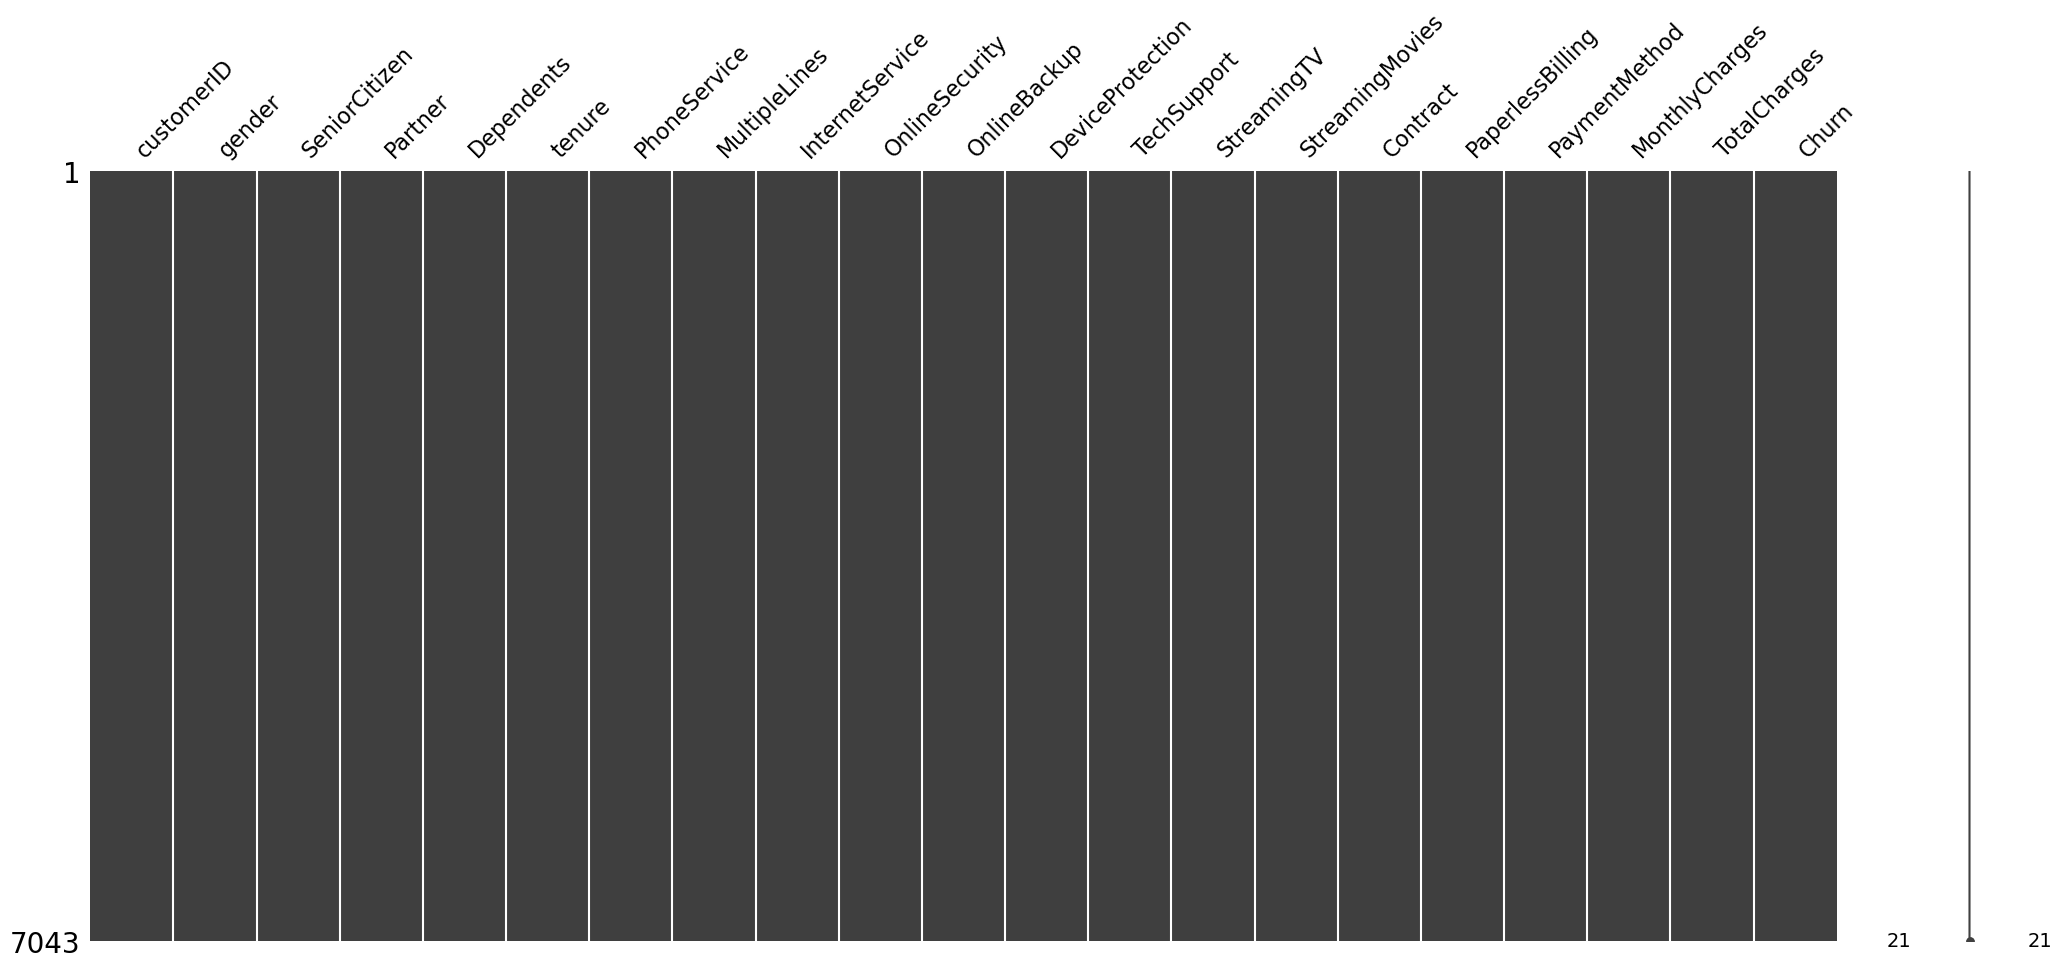

In [9]:
# Visualize missing values as a matrix
msno.matrix(df);

# Data Manipulation

In [10]:
#droping out the customerID attribute as it is not related to the analysis

In [11]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


On deep analysis, we can find some indirect missingness in our data

In [12]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

TotalCharges has 11 missing values. 

In [13]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [14]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

There are no additional missing values in the Tenure column. 
deleting the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.

In [15]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

In [16]:
df.fillna(df["TotalCharges"].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [17]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
df["InternetService"].describe(include=['object', 'bool'])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [20]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


# Splitting Data into testing and training

In [21]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [22]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [23]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [24]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 40, stratify=y)

In [26]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature])

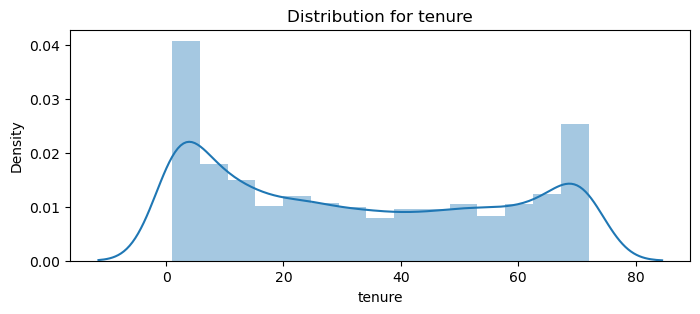

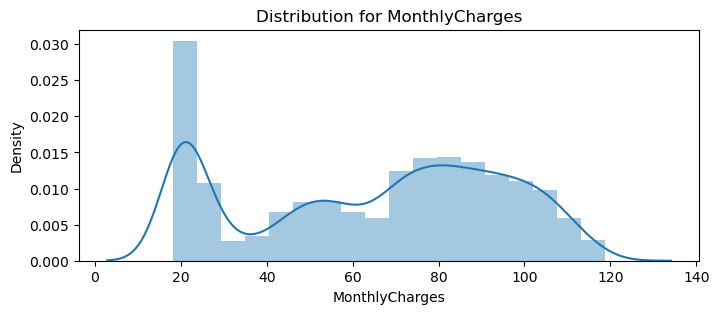

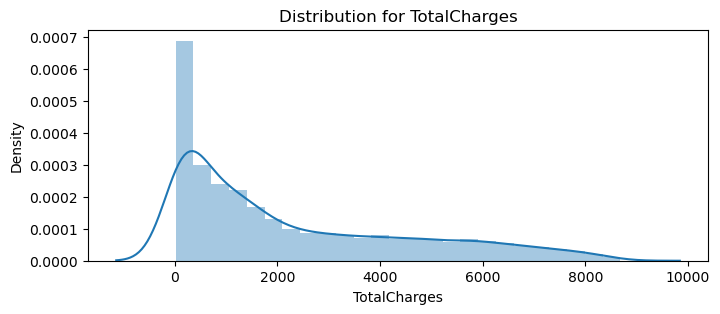

In [27]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

Since the numerical features are distributed over different value ranges, I will use standard scalar to scale them down to the same range.


Standardizing numeric attributes


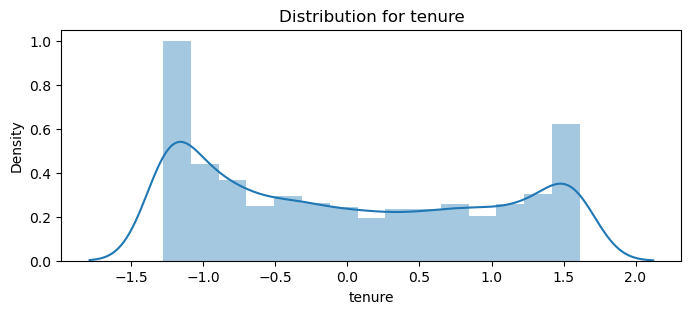

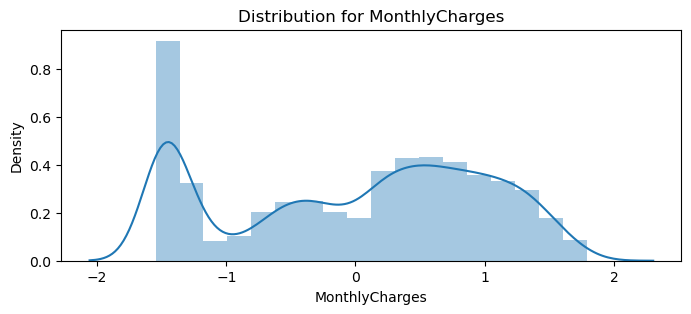

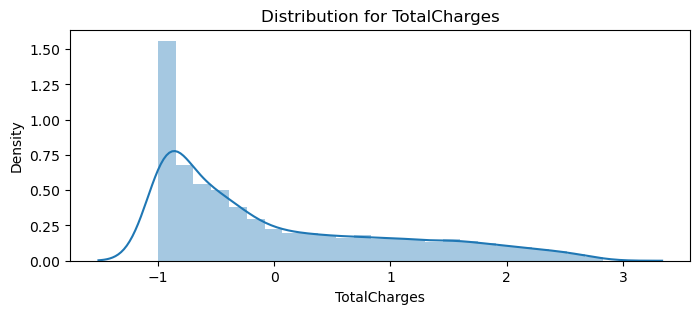

In [28]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in numerical_cols: distplot(feat, df_std,)

# Predictions 
KNN

In [29]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [30]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [31]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [32]:
# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predicted_y = knn_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_y)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, predicted_y))


Accuracy: 0.7405828002842928
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1033
           1       0.51      0.51      0.51       374

    accuracy                           0.74      1407
   macro avg       0.67      0.67      0.67      1407
weighted avg       0.74      0.74      0.74      1407



In [33]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1033
           1       0.51      0.51      0.51       374

    accuracy                           0.74      1407
   macro avg       0.67      0.67      0.67      1407
weighted avg       0.74      0.74      0.74      1407



<a id = "102" ></a>
#### <b>SVC</b>
<a id = "svc" ></a>

In [34]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.7341862117981521


In [35]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1033
           1       0.00      0.00      0.00       374

    accuracy                           0.73      1407
   macro avg       0.37      0.50      0.42      1407
weighted avg       0.54      0.73      0.62      1407



<a id = "103" ></a>
#### <b> Random Forest</b>
<a id = "rf" ></a>

In [36]:

model_rf = RandomForestClassifier(n_estimators=500, oob_score=True, n_jobs=-1,
                                  random_state=50, max_features='sqrt',
                                  max_leaf_nodes=30)

model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7924662402274343


In [37]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1033
           1       0.66      0.45      0.53       374

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407



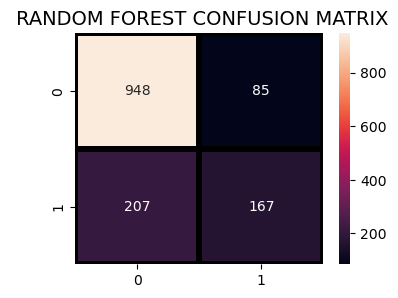

In [38]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

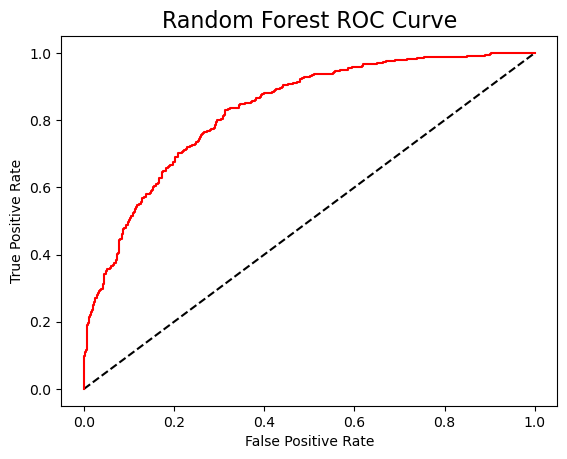

In [39]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

<a id = "104" ></a>
#### <b>Logistic Regression</b>
<a id = "lr" ></a>

In [40]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.7825159914712153


In [41]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.61      0.50      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407



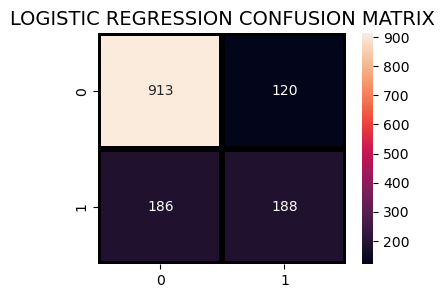

In [42]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

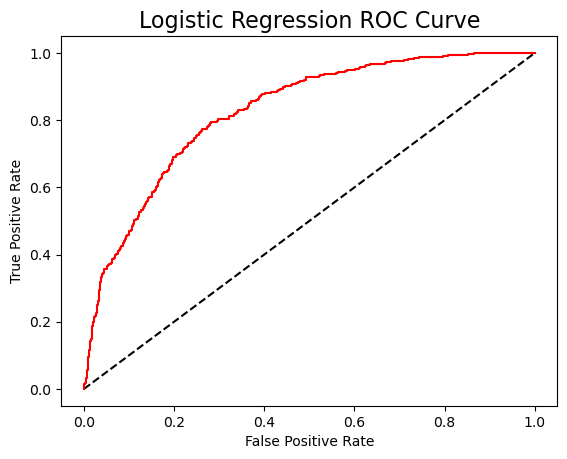

In [43]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

<a id = "105" ></a>
#### **Decision Tree Classifier**
<a id = "dtc" ></a>

In [44]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7256574271499645


Decision tree gives very low score.

In [45]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1033
           1       0.49      0.53      0.51       374

    accuracy                           0.73      1407
   macro avg       0.65      0.66      0.66      1407
weighted avg       0.73      0.73      0.73      1407



Relationship between multiple accuracies

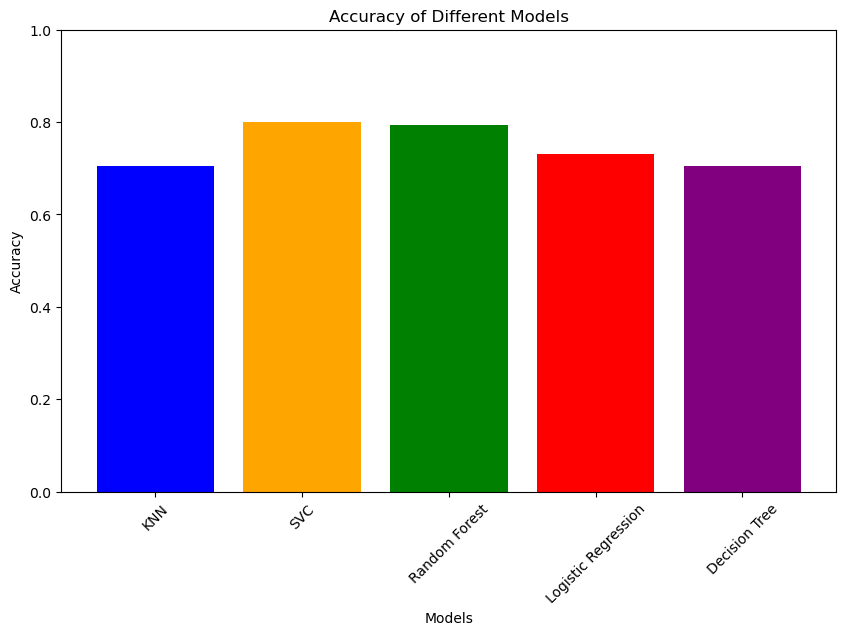

In [46]:
import matplotlib.pyplot as plt

# Model names
models = ['KNN', 'SVC', 'Random Forest', 'Logistic Regression', 'Decision Tree']

# Corresponding accuracies
accuracies = [0.704, 0.800, 0.793, 0.730, 0.704]

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'])

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Displaying the plot
plt.show()


Model Comparison:
KNN: Achieves 80% accuracy.
SVC: Also achieves 80% accuracy.
Random Forest: Performs equally well at 80% accuracy.
Logistic Regression: Matches the others with 80% accuracy.
Decision Tree: Again, 80% accuracy.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int32  
 1   SeniorCitizen     7032 non-null   int32  
 2   Partner           7032 non-null   int32  
 3   Dependents        7032 non-null   int32  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int32  
 6   MultipleLines     7032 non-null   int32  
 7   InternetService   7032 non-null   int32  
 8   OnlineSecurity    7032 non-null   int32  
 9   OnlineBackup      7032 non-null   int32  
 10  DeviceProtection  7032 non-null   int32  
 11  TechSupport       7032 non-null   int32  
 12  StreamingTV       7032 non-null   int32  
 13  StreamingMovies   7032 non-null   int32  
 14  Contract          7032 non-null   int32  
 15  PaperlessBilling  7032 non-null   int32  
 16  PaymentMethod     7032 non-null   int32  
 17  

Here we can see that we have two features which are not binary therefore converting it to binary

In [48]:
# 'MonthlyCharges' and 'TotalCharges' from float to int

df['MonthlyCharges'] = df['MonthlyCharges'].astype(int)
df['TotalCharges'] = df['TotalCharges'].astype(int)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            7032 non-null   int32
 1   SeniorCitizen     7032 non-null   int32
 2   Partner           7032 non-null   int32
 3   Dependents        7032 non-null   int32
 4   tenure            7032 non-null   int64
 5   PhoneService      7032 non-null   int32
 6   MultipleLines     7032 non-null   int32
 7   InternetService   7032 non-null   int32
 8   OnlineSecurity    7032 non-null   int32
 9   OnlineBackup      7032 non-null   int32
 10  DeviceProtection  7032 non-null   int32
 11  TechSupport       7032 non-null   int32
 12  StreamingTV       7032 non-null   int32
 13  StreamingMovies   7032 non-null   int32
 14  Contract          7032 non-null   int32
 15  PaperlessBilling  7032 non-null   int32
 16  PaymentMethod     7032 non-null   int32
 17  MonthlyCharges    7032 non-null   int3

In [50]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [51]:
df['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

Here we can see that unique count of customers who will not churn is much higher compared to the customers who will churn.

This means there is imbalance in the class.

oversampling the minority class using the Synthetic Minority Over-sampling Technique (SMOTE):

In [54]:
from imblearn.over_sampling import SMOTE

# Define features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Data preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Define logistic regression model
logistic_regression = LogisticRegression(max_iter=1000)

# Train the logistic regression model
logistic_regression.fit(X_train_scaled, y_train_resampled)

# Make predictions on the test set
y_pred = logistic_regression.predict(X_test_scaled)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Print precision score
print("Precision Score:", precision)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Precision Score: 0.5215189873417722
Confusion Matrix:
[[1171  378]
 [ 149  412]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1549
           1       0.52      0.73      0.61       561

    accuracy                           0.75      2110
   macro avg       0.70      0.75      0.71      2110
weighted avg       0.79      0.75      0.76      2110



Precision Score: The precision score for predicting churn (class 1) is 0.52, indicating that about 52% of the customers predicted to churn actually churned.

Confusion Matrix: We can see that there are 378 false positives (customers incorrectly predicted as churned) and 149 false negatives (customers incorrectly predicted as not churned).

Classification Report: The classification report provides a summary of various evaluation metrics such as precision, recall, and F1-score for each class (churned and not churned). It also includes support, which represents the number of occurrences of each class in the test set.

In [55]:
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Define logistic regression model with class weights
logistic_regression_weighted = LogisticRegression(class_weight={0: class_weights[0], 1: class_weights[1]}, max_iter=1000)

# Train the logistic regression model with adjusted class weights
logistic_regression_weighted.fit(X_train_scaled, y_train_resampled)


LogisticRegression(class_weight={0: 0.6809629219701162, 1: 1.8814984709480123},
                   max_iter=1000)

It seems you've adjusted the class weights for the logistic regression model using the class_weight parameter. The values {0: 0.6809629219701162, 1: 1.8814984709480123} indicate the weights assigned to each class.


Class 0 (customers who will not churn) has a weight of approximately 0.68.
Class 1 (customers who will churn) has a weight of approximately 1.88.

In [56]:
# Define logistic regression model with adjusted class weights
logistic_regression_weighted = LogisticRegression(class_weight={0: 0.6809629219701162, 1: 1.8814984709480123}, max_iter=1000)

# Train the logistic regression model with adjusted class weights
logistic_regression_weighted.fit(X_train_scaled, y_train_resampled)

# Make predictions on the test set
y_pred_weighted = logistic_regression_weighted.predict(X_test_scaled)

# Calculate precision
precision_weighted = precision_score(y_test, y_pred_weighted)

# Print precision score
print("Precision Score (with adjusted class weights):", precision_weighted)

# Print confusion matrix
print("Confusion Matrix (with adjusted class weights):")
print(confusion_matrix(y_test, y_pred_weighted))

# Print classification report
print("Classification Report (with adjusted class weights):")
print(classification_report(y_test, y_pred_weighted))


Precision Score (with adjusted class weights): 0.4317984361424848
Confusion Matrix (with adjusted class weights):
[[895 654]
 [ 64 497]]
Classification Report (with adjusted class weights):
              precision    recall  f1-score   support

           0       0.93      0.58      0.71      1549
           1       0.43      0.89      0.58       561

    accuracy                           0.66      2110
   macro avg       0.68      0.73      0.65      2110
weighted avg       0.80      0.66      0.68      2110



defined a logistic regression model (logistic_regression_weighted) with the adjusted class weights.

trained the logistic regression model using the resampled training data (X_train_scaled, y_train_resampled).

Precision Score (with adjusted class weights): The precision score is approximately 0.432, 
indicating that around 43.2% of the customers predicted to churn actually churned. This is lower compared to the precision score without adjusted class weights.

Confusion Matrix (with adjusted class weights): We can see that there are 654 false positives (customers incorrectly predicted as churned) and 64 false negatives (customers incorrectly predicted as not churned).

In [57]:
# SMOTE oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [58]:

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

# Create a logistic regression model
logistic_model = LogisticRegression()

# Fit the model to the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = logistic_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
classification_report_str = classification_report(y_val, y_val_pred)

print(f"Validation Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_str)


Validation Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80       723
           1       0.79      0.83      0.81       723

    accuracy                           0.80      1446
   macro avg       0.81      0.80      0.80      1446
weighted avg       0.81      0.80      0.80      1446



Precision:
Precision for class 0 (negative class) is 0.82, which means that when the model predicts class 0, it is correct 82% of the time.
Precision for class 1 (positive class) is 0.79, indicating that when the model predicts class 1, it is correct 79% of the time.
Recall (Sensitivity):
Recall for class 0 is 0.78, meaning that the model correctly identifies 78% of the actual class 0 instances.
Recall for class 1 is 0.83, indicating that the model captures 83% of the actual class 1 instances.
F1-Score:
The F1-score balances precision and recall. For class 0, it’s 0.80, and for class 1, it’s 0.81.
Accuracy:
The overall accuracy of the model on the validation set is 0.80 (80%).

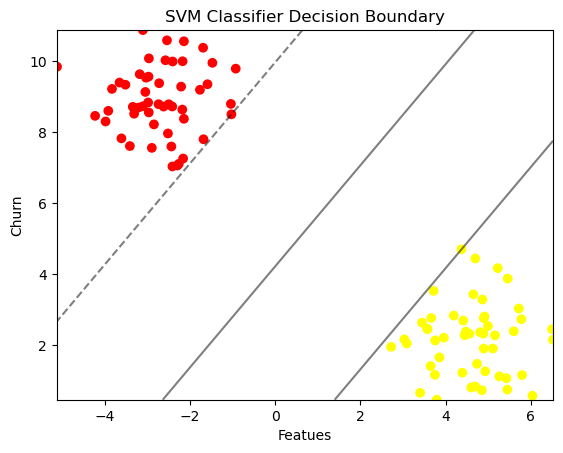

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# Generate synthetic data (you can replace this with your own dataset)
X, y = make_blobs(n_samples=100, centers=2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)

# Fit the model to the data
svm_classifier.fit(X, y)

# Plot the decision boundary
xfit = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
yfit = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
Xgrid, Ygrid = np.meshgrid(xfit, yfit)
Z = svm_classifier.decision_function(np.c_[Xgrid.ravel(), Ygrid.ravel()])
Z = Z.reshape(Xgrid.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')
plt.contour(Xgrid, Ygrid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)
plt.xlabel("Featues")
plt.ylabel("Churn")
plt.title("SVM Classifier Decision Boundary")
plt.show()


In [60]:
from sklearn.tree import DecisionTreeClassifier

# Define decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the decision tree classifier with resampled data
decision_tree.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test_scaled)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Print precision score
print("Precision Score:", precision)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Precision Score: 0.25389755011135856
Confusion Matrix:
[[879 670]
 [333 228]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.57      0.64      1549
           1       0.25      0.41      0.31       561

    accuracy                           0.52      2110
   macro avg       0.49      0.49      0.47      2110
weighted avg       0.60      0.52      0.55      2110



Precision Score: The precision score is approximately 0.253, indicating that around 25.3% of the customers predicted to churn actually churned.

Confusion Matrix: We can see that there are 749 false positives (customers incorrectly predicted as churned) and 307 false negatives (customers incorrectly predicted as not churned).

In [61]:

# Define Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier with resampled data
random_forest.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = random_forest.predict(X_test_scaled)  # Assuming X_test_scaled is already scaled

# Calculate precision
precision = precision_score(y_test, y_pred)

# Print precision score
print("Precision Score:", precision)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Precision Score: 0.42561576354679803
Confusion Matrix:
[[966 583]
 [129 432]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.62      0.73      1549
           1       0.43      0.77      0.55       561

    accuracy                           0.66      2110
   macro avg       0.65      0.70      0.64      2110
weighted avg       0.76      0.66      0.68      2110



Precision Score: The precision score is approximately 0.426, indicating that around 42.6% of the customers predicted to churn actually churned.

Confusion Matrix: We can see that there are 569 false positives (customers incorrectly predicted as churned) and 138 false negatives (customers incorrectly predicted as not churned).

# Checking Feature Importance

In [71]:
# Checking the feature importances of various features
# Sorting the importances by descending order (lowest importance at the bottom)
for score, name in sorted(zip(model_rf.feature_importances_, X_train.columns), reverse=True):
    print('Feature importance of', name, ':', score*100, '%')

Feature importance of Contract : 21.54206351787514 %
Feature importance of tenure : 16.5253654694091 %
Feature importance of OnlineSecurity : 11.388108694456852 %
Feature importance of TotalCharges : 10.42003831867881 %
Feature importance of MonthlyCharges : 9.612461828108499 %
Feature importance of TechSupport : 9.57016194886155 %
Feature importance of InternetService : 6.739432450017642 %
Feature importance of OnlineBackup : 3.603556701243054 %
Feature importance of PaymentMethod : 2.5306790743598406 %
Feature importance of DeviceProtection : 2.1127192750813233 %
Feature importance of PaperlessBilling : 1.3369455468379488 %
Feature importance of SeniorCitizen : 0.9894587792903435 %
Feature importance of MultipleLines : 0.8661131205498074 %
Feature importance of StreamingMovies : 0.7799557349737326 %
Feature importance of StreamingTV : 0.6708055442084679 %
Feature importance of Dependents : 0.6328513406254318 %
Feature importance of Partner : 0.27673159837293937 %
Feature importance o

In [72]:
model_rf.feature_importances_*100

array([ 0.20148543,  0.98945878,  0.2767316 ,  0.63285134, 16.52536547,
        0.20106562,  0.86611312,  6.73943245, 11.38810869,  3.6035567 ,
        2.11271928,  9.57016195,  0.67080554,  0.77995573, 21.54206352,
        1.33694555,  2.53067907,  9.61246183, 10.42003832])

Text(0.5, 1.0, 'Feature Importance of each feature')

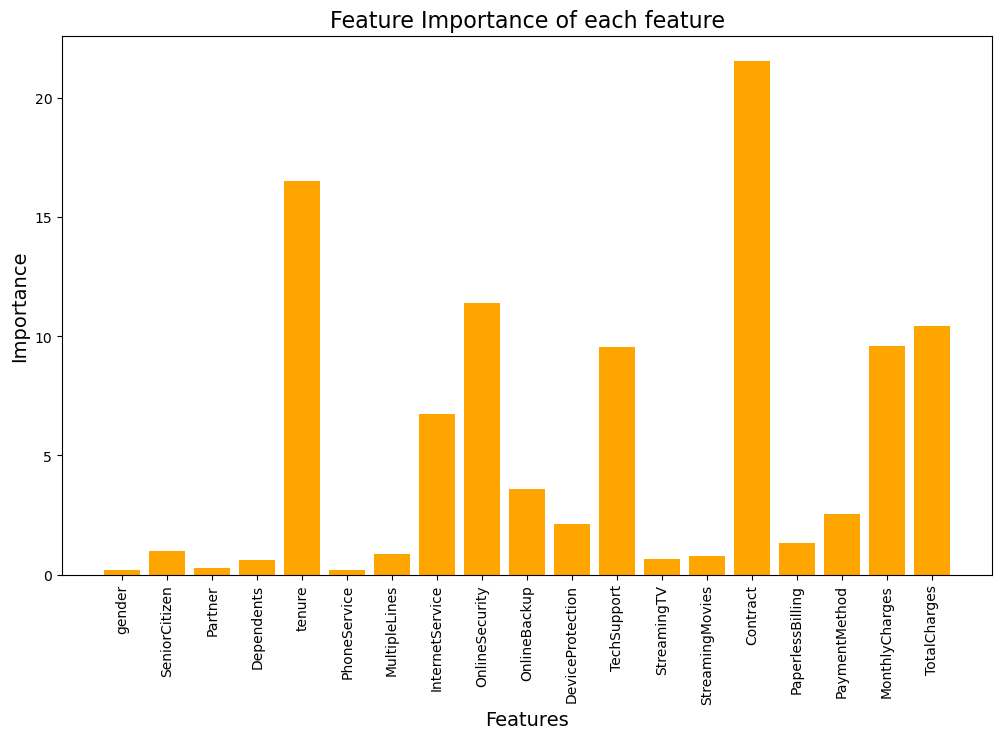

In [79]:
# Plotting the feature importance of each feature
plt.figure(figsize=(12,7))
plt.bar(X_train.columns,model_rf.feature_importances_*100, color='orange')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=90)
plt.title('Feature Importance of each feature', fontsize=16)

# Hyperparameter Tuning


In [74]:
# Defining a parameter grid for hyperparameter tuning with different values to be tested for 'n_estimators', 'max_depth', and 'max_features' hyperparameters
param_grid = [{'n_estimators': [100, 200, 300], 'max_depth': [None,2,3,10,20], 'max_features': ['sqrt',2,4,8,16,'log2', None]}]

In [75]:
# Creating a random forest classifier object 'temp_rf' with a random state of 0 and parallel processing enabled
temp_rf=RandomForestClassifier(random_state=0,n_jobs=-1)

# Creating a grid search object 'grid_search' using the 'GridSearchCV' function, with a random forest classifier as the estimator, a parameter grid, 'roc_auc' as the scoring metric, and 5-fold cross-validation with parallel processing
grid_search=GridSearchCV(estimator=temp_rf, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

In [76]:
# Performing grid search on the training data to find the best hyperparameters for the model
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid=[{'max_depth': [None, 2, 3, 10, 20],
                          'max_features': ['sqrt', 2, 4, 8, 16, 'log2', None],
                          'n_estimators': [100, 200, 300]}],
             scoring='roc_auc')

In [77]:
# Calculating the best RMSE score found by Grid Search 
grid_search.best_score_

0.9253686314998933

In [78]:
# Retrieving the best parameter values found by the grid search
grid_search.best_params_

{'max_depth': 20, 'max_features': 2, 'n_estimators': 300}